<a href="https://colab.research.google.com/github/pa0lai/DeepLearning/blob/main/Housing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

安裝快樂版函式庫


In [ ]:
# 先檢查是否存在 HappyML 這個資料夾，若沒有，則下載
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

資料前處理

載入資料

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
print(dataset)  #：列出 dataset 有哪些東⻄
# print(dataset.keys())#：可以列出 dataset 有哪些欄位
# print(dataset["DESCR"])#：漂亮列出 dataset 的說明
# print(dataset["data"])#：列出自變數 X 資料的大致情況
# print(dataset["target"])#：列出應變數 Y 資料的大致情況
# print(dataset["feature_names"])#：印出自變數 X 所有欄位名稱

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

切分自變數與應變數

In [ ]:
import HappyML.preprocessor as pp

# Decomposition
import pandas as pd
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=["Price"])



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


切分訓練集、測試集與特徵縮放

In [ ]:
# Split Training vs. Testing Data
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

# Feature Scaling (Optional)
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

建構神經網路各層級

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

神經網路編譯

In [ ]:
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

模型訓練

In [ ]:
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=30)

Epoch 1/30
2642/2642 [==============================] - 9s 4ms/step - loss: 0.2329 - mse: 0.2329 - val_loss: 0.2654 - val_mse: 0.2654
Epoch 2/30
2642/2642 [==============================] - 10s 4ms/step - loss: 0.2298 - mse: 0.2298 - val_loss: 0.2693 - val_mse: 0.2693
Epoch 3/30
2642/2642 [==============================] - 10s 4ms/step - loss: 0.2298 - mse: 0.2298 - val_loss: 0.2621 - val_mse: 0.2621
Epoch 4/30
2642/2642 [==============================] - 9s 4ms/step - loss: 0.2300 - mse: 0.2300 - val_loss: 0.2936 - val_mse: 0.2936
Epoch 5/30
2642/2642 [==============================] - 9s 3ms/step - loss: 0.2273 - mse: 0.2273 - val_loss: 0.2747 - val_mse: 0.2747
Epoch 6/30
2642/2642 [==============================] - 10s 4ms/step - loss: 0.2273 - mse: 0.2273 - val_loss: 0.2631 - val_mse: 0.2631
Epoch 7/30
2642/2642 [==============================] - 10s 4ms/step - loss: 0.2313 - mse: 0.2313 - val_loss: 0.2618 - val_mse: 0.2618
Epoch 8/30
2642/2642 [==============================] - 10

模型校正

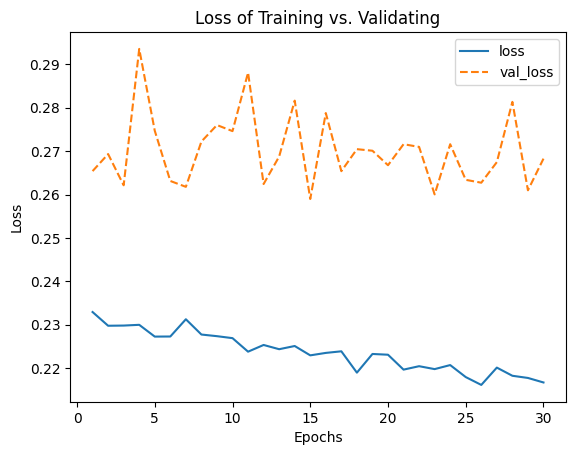

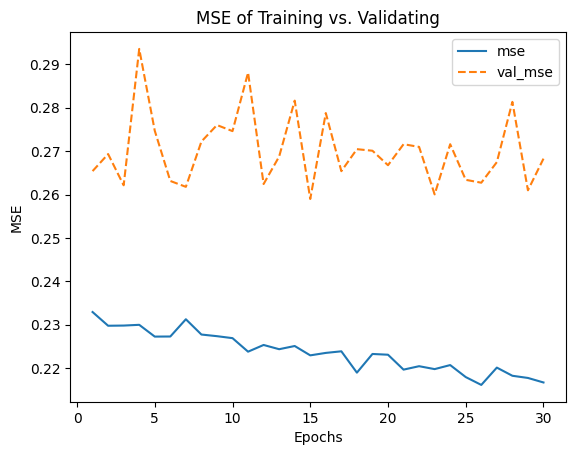

In [ ]:
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

模型預測

In [ ]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

129/129 [==============================] - 0s 1ms/step
       Price     Price
11476  2.857  2.920925
6067   2.621  2.373529
2576   0.830  0.868873
12203  1.456  1.757346
2157   0.899  0.938216
...      ...       ...
7503   0.933  1.079592
16420  1.625  0.805469
15449  1.826  2.184546
12110  0.953  1.072779
16604  1.952  2.072139

[4128 rows x 2 columns]


模型評估

In [ ]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

129/129 [==============================] - 0s 2ms/step - loss: 0.2782 - mse: 0.2782
Loss of Testing Set: 0.2782336473464966
MSE of Testing Set: 0.2782336473464966
